## 목표
 - 스타벅스 매장이 있는 구 및 매장 수 조사
 - 스타벅스가 있는 구를 바탕으로 이디야 매장 수 조사
 - 각 구에 있는 매장 수 확인
 - 구별 매장 수 차이 확인을 통한 결과 도출


In [203]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import re

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

## 필요 정보
- 스타벅스, 이디야 별 매장이름, 구, 주소


## 스타벅스

In [256]:
# 스타벅스 매장 홈페이지 열기 
star_url ="https://www.starbucks.co.kr/store/store_map.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(star_url)


In [257]:
# 지역검색 > 서울 > 전체 순으로 들어가기
driver.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [258]:
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

In [259]:
# 매장 갯수 조회, 표본 확인
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(585,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [261]:
# 표본을 대상으로 필요 정보 변수에 저장해보기

#name = info[0].find("strong").text.strip()
#address = info[0].find(class_="result_details").text.strip()[:-9]
#place = address.split(" ")[1]

#name, address, place
    

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [262]:
# for 문을 이용한 전체 리스트 만들기, 길이를 통하여 모든 데이터가 들어갔는지 확인

star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

585

In [263]:
# DataFrame에 저장 후 정렬, tail을 통하여 잘 들어갔는지 확인

df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
580,중랑구청,중랑구,서울특별시 중랑구 신내로 72
581,사가정역,중랑구,서울특별시 중랑구 면목로 310
582,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
583,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
584,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [264]:
# 구 리스트 만들기

gu_list = list(set(df_star["구"]))
gu_list

['구로구',
 '중구',
 '은평구',
 '서대문구',
 '강서구',
 '도봉구',
 '강북구',
 '중랑구',
 '금천구',
 '동대문구',
 '노원구',
 '영등포구',
 '동작구',
 '용산구',
 '강남구',
 '종로구',
 '광진구',
 '성동구',
 '강동구',
 '양천구',
 '성북구',
 '서초구',
 '마포구',
 '관악구',
 '송파구']

## 이디야

In [265]:
# 이디야 매장 검색 페이지 열기 
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(edi_url)



In [167]:
# 표본으로 작동 확인
#driver.find_element_by_xpath('//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
##driver.find_element_by_xpath('//*[@id="keyword"]').clear
#driver.find_element_by_xpath('//*[@id="keyword"]').send_keys("서울 강남구")
#driver.find_element_by_xpath('//*[@id="keyword_div"]/form/button').click()

#html = driver.page_source
#soup = BeautifulSoup(html, "html.parser")

#info = soup.find("ul", id = "placesList").find_all("li", class_='item')

#info

[<li class="item"><a href="#c" onclick="panLatTo('0','0','0');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남YMCA점</dt> <dd>서울 강남구 논현동</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.0401601992311','37.51654171724045','1');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남구청역아이티웨딩점</dt> <dd>서울 강남구 학동로 338 (논현동, 강남파라곤)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.02810578707652','37.51408005446769','2');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남논현학동점</dt> <dd>서울 강남구 논현로131길 28 (논현동)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.05242928262568','37.50133876179308','3');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남대치점</dt> <dd>서울 강남구 역삼로 415 (대치동, 성진빌딩)</dd></dl></a></li>,
 <li class="item"><a href="#c" onc

In [266]:
# for 문을 이용하여 각 구별 매장 저장, 길이로 작동 확인
edi_info = []



for gu in gu_list:
    driver.find_element_by_xpath('//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element_by_xpath('//*[@id="keyword"]').clear
    driver.find_element_by_xpath('//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element_by_xpath('//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

681

In [267]:
# 이디야 정보를 DataFrame에 저장, tail을 통하여 모든 데이터 저장 확인
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
676,신림역점,관악구,서울 관악구 신림로 312 (신림동)
677,신림중앙점,관악구,서울 관악구 관천로 52 (신림동)
678,신림패션문화점,관악구,서울 관악구 봉천로6길 24 (신림동)
679,인헌점,관악구,서울 관악구 인헌길 17 (봉천동)
680,청룡중앙점,관악구,"서울 관악구 쑥고개로 80 (봉천동, 제이빌딩)"


## 구별 매장 수 확인 및 차이 구하기

In [268]:
# 스타벅스 구별 매장수 
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,구로구,12
1,중구,53
2,은평구,10
3,서대문구,21
4,강서구,25
5,도봉구,4
6,강북구,6
7,중랑구,7
8,금천구,13
9,동대문구,9


In [269]:
# 이디야 구별 매장수 
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,구로구,28
1,중구,30
2,은평구,27
3,서대문구,21
4,강서구,45
5,도봉구,24
6,강북구,20
7,중랑구,27
8,금천구,23
9,동대문구,25


In [270]:
# 매장수 차이를 나타낸 DataFrame 만들기
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,구로구,28,12,16
1,중구,30,53,-23
2,은평구,27,10,17
3,서대문구,21,21,0
4,강서구,45,25,20
5,도봉구,24,4,20
6,강북구,20,6,14
7,중랑구,27,7,20
8,금천구,23,13,10
9,동대문구,25,9,16


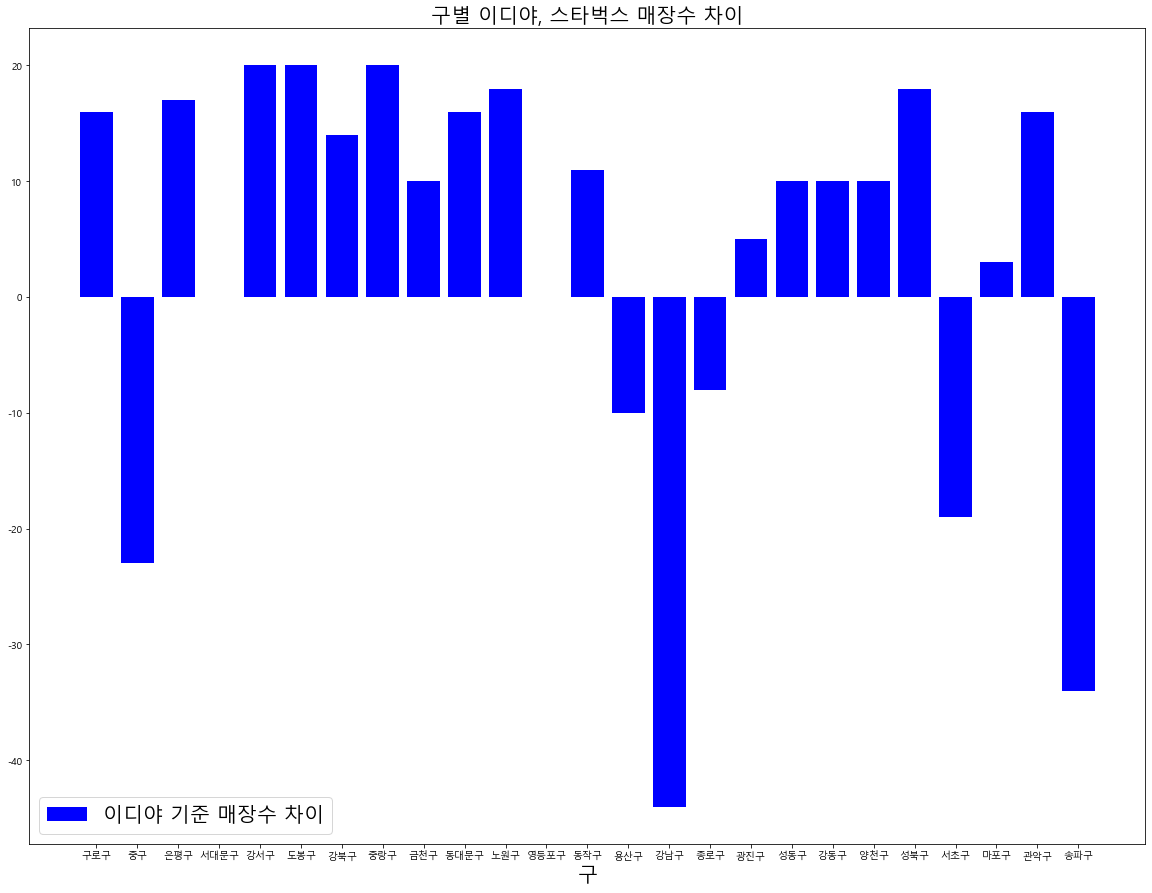

In [271]:
# 매장 수 차이 데이터 시각화
a = sum_data["매장 수 차이"]
y = "ediya"

plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()

## 분석결과
구별 이디야, 스타벅스 매장 수 차이 그래프를 보면 25개구 중 5개의 구에서만 스타벅스 매장수가 더 많고
나머지 20개의 구에서는 이디야 매장의 수가 더 많음을 알 수 있다.
사람들이 보기에는 항상 스타벅스 근처에 이디야가 있는것 처럼 보여 이디야가 전략적으로 스타벅스 옆에 매장을 
따라서 내는것 처럼 보이지만 매장 수가 많아서 그렇게 보이는 것일뿐 실제로는 이디야 매장수가 더 많은 구가 훨씬 더 많다.
따라서 결론은 이디야 매장이 전략적으로 스타벅스 매장 근처에 위치한다는 것은 거짓이다.